Bird: Mourning Dove

https://www.pwrc.usgs.gov/bbs/RawData/

In [2]:
import pandas as pd

df = pd.read_csv("mourningdove.csv")
df

,Country,State,Route,Year,Aou,SpeciesTotal
0,124.0,4.0,1.0,1990.0,3160.0,7.0
1,124.0,4.0,1.0,1991.0,3160.0,32.0
2,124.0,4.0,1.0,1992.0,3160.0,1.0
3,124.0,4.0,1.0,1993.0,3160.0,2.0
4,124.0,4.0,1.0,1994.0,3160.0,5.0
...,...,...,...,...,...,...
76660,840.0,92.0,901.0,2018.0,3160.0,1.0
76661,840.0,92.0,902.0,2004.0,3160.0,25.0
76662,840.0,92.0,902.0,2006.0,3160.0,13.0
76663,840.0,92.0,902.0,2015.0,3160.0,2.0


In [3]:
# Grouping by State, ignoring individual routes and aggregating them to state level

df_grouped = df.groupby(['State', 'Year'], as_index=False)['SpeciesTotal'].sum()
df_grouped

,State,Year,SpeciesTotal
0,2.0,1990.0,1891.0
1,2.0,1991.0,1802.0
2,2.0,1992.0,1776.0
3,2.0,1993.0,2127.0
4,2.0,1994.0,2098.0
...,...,...,...
1720,92.0,2016.0,906.0
1721,92.0,2017.0,795.0
1722,92.0,2018.0,771.0
1723,92.0,2019.0,519.0


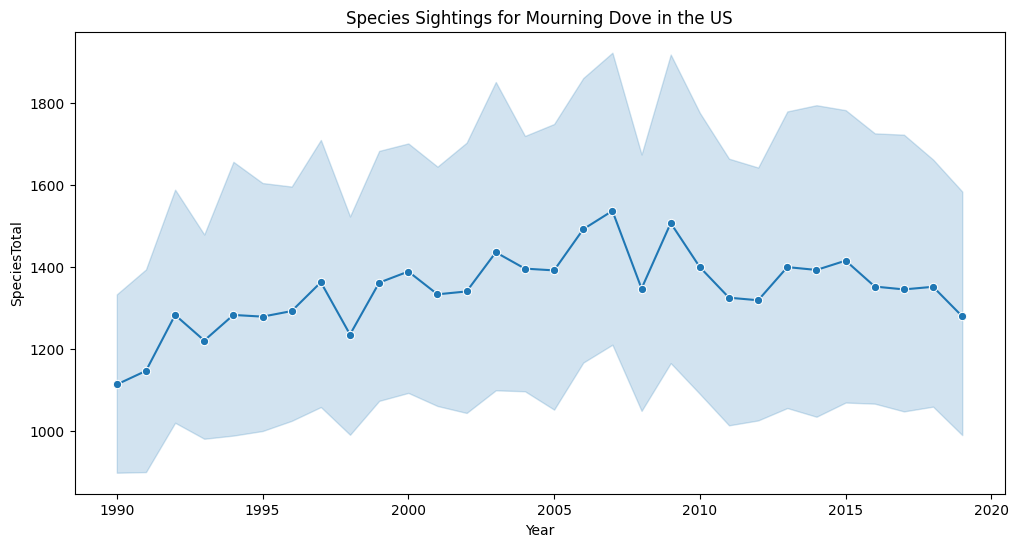

In [4]:
# Visualizing our data 

import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
sns.lineplot(data=df_grouped, x="Year", y="SpeciesTotal", marker="o")

plt.title("Species Sightings for Mourning Dove in the US", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("SpeciesTotal", fontsize=10)

plt.show()

In [5]:
df_grouped["State"].unique()

array([ 2.,  4.,  6.,  7., 11., 14., 17., 18., 21., 25., 27., 33., 34.,
       35., 36., 38., 39., 42., 44., 45., 46., 47., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 63., 64., 65., 66.,
       67., 68., 69., 72., 75., 76., 77., 79., 80., 81., 82., 83., 85.,
       87., 88., 89., 90., 91., 92., 93.])

The metadata defines each state: 

'''
02,Alabama; 03,Alaska; 04,Alberta; 06,Arizona; 07,Arkansas; 11,British Columbia; 14,California; 17,Colorado; 18,Connecticut; 21,Delaware; 25,Florida; 27,Georgia; 33,Idaho; 34,Illinois; 35,Indiana; 36,Iowa; 38,Kansas; 39,Kentucky; 42,Louisiana; 43,Northwest Territories; 44,Maine; 45,Manitoba; 46,Maryland; 47,Massachusetts; 49,Michigan; 50,Minnesota; 51,Mississippi; 52,Missouri; 53,Montana; 54,Nebraska; 55,Nevada; 56,New Brunswick; 57,Newfoundland and Labrador; 58,New Hampshire; 59,New Jersey; 60,New Mexico; 61,New York; 62,Nunavut; 63,North Carolina; 64,North Dakota; 65,Nova Scotia; 66,Ohio; 67,Oklahoma; 68,Ontario; 69,Oregon; 72,Pennsylvania; 75,Prince Edward Island; 76,Quebec; 77,Rhode Island; 79,Saskatchewan; 80,South Carolina; 81,South Dakota; 82,Tennessee; 83,Texas; 85,Utah; 87,Vermont; 88,Virginia; 89,Washington; 90,West Virginia; 91,Wisconsin; 92,Wyoming; 93,Yukon
'''

We will use, for now, 07 Arkansas, 34 Illinois, 52 Missouri.

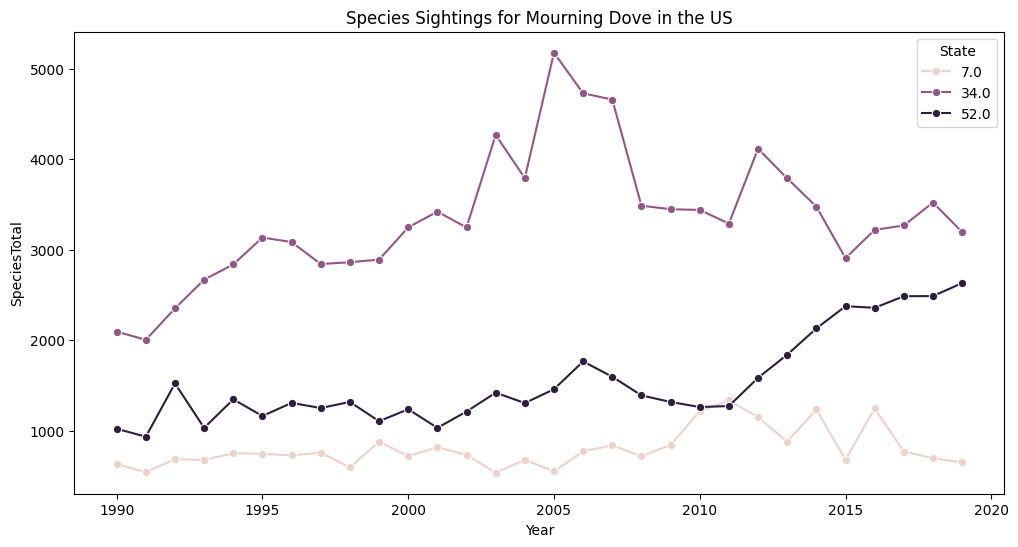

In [6]:
# Visualizing our data 

import seaborn as sns
import matplotlib.pyplot as plt 

df_filtered = df_grouped[df_grouped["State"].isin([7,34,52])]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtered, x="Year", y="SpeciesTotal", hue="State", marker="o")

plt.title("Species Sightings for Mourning Dove in the US", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("SpeciesTotal", fontsize=10)
plt.show()

In [7]:
df_filtered

,State,Year,SpeciesTotal
90,7.0,1990.0,629.0
91,7.0,1991.0,542.0
92,7.0,1992.0,684.0
93,7.0,1993.0,676.0
94,7.0,1994.0,750.0
...,...,...,...
775,52.0,2015.0,2376.0
776,52.0,2016.0,2358.0
777,52.0,2017.0,2486.0
778,52.0,2018.0,2488.0


Now comparing with emission types

In [8]:
import pandas as pd

df_emissions = pd.read_csv("full_data.csv")

states = {
    'Arkansas': 7,
    'Illinois': 34,
    'Missouri': 52
}

df_emissions.rename(columns={'Region': 'State', 'Value': 'Emissions'}, inplace=True)
df_emissions['State'] = df_emissions['State'].map(states)
df_emissions = df_emissions[df_emissions["State"].isin([7, 34, 52])]

df_emissions_pivoted = df_emissions.pivot_table(index=['State', 'Year'], columns='Emission Type', values='Emissions', aggfunc='sum')
df_emissions_pivoted.columns = [col for col in df_emissions_pivoted.columns]
df_emissions_pivoted.reset_index(inplace=True)
df_combined = pd.merge(df_filtered, df_emissions_pivoted, on=['State', 'Year'], how='left')
df_combined = df_combined.drop(columns=['Gross total', 'Net total'])

(df_combined)


,State,Year,SpeciesTotal,Carbon dioxide,Fluorinated gases,Land use and forestry carbon stock change,Methane,Nitrous oxide
0,7.0,1990.0,629.0,54.132545,1.786645,-54.692963,19.292660,6.820905
1,7.0,1991.0,542.0,52.856844,1.774128,-53.677058,20.753636,6.932789
2,7.0,1992.0,684.0,54.872688,1.784589,-53.177882,19.099499,7.071014
3,7.0,1993.0,676.0,53.910021,1.821897,-52.455692,19.912666,7.185217
4,7.0,1994.0,750.0,57.663686,1.931176,-51.678457,20.257696,7.031927
...,...,...,...,...,...,...,...,...
85,52.0,2015.0,2376.0,131.141261,3.751684,-24.649114,13.959973,16.166956
86,52.0,2016.0,2358.0,124.714462,3.251369,-23.865313,14.543042,14.071274
87,52.0,2017.0,2486.0,130.783979,3.384542,-23.793008,14.902632,15.683796
88,52.0,2018.0,2488.0,131.588221,3.078250,-24.213457,15.575442,16.136778


Let's look at one state. We choose Arkansas for now.

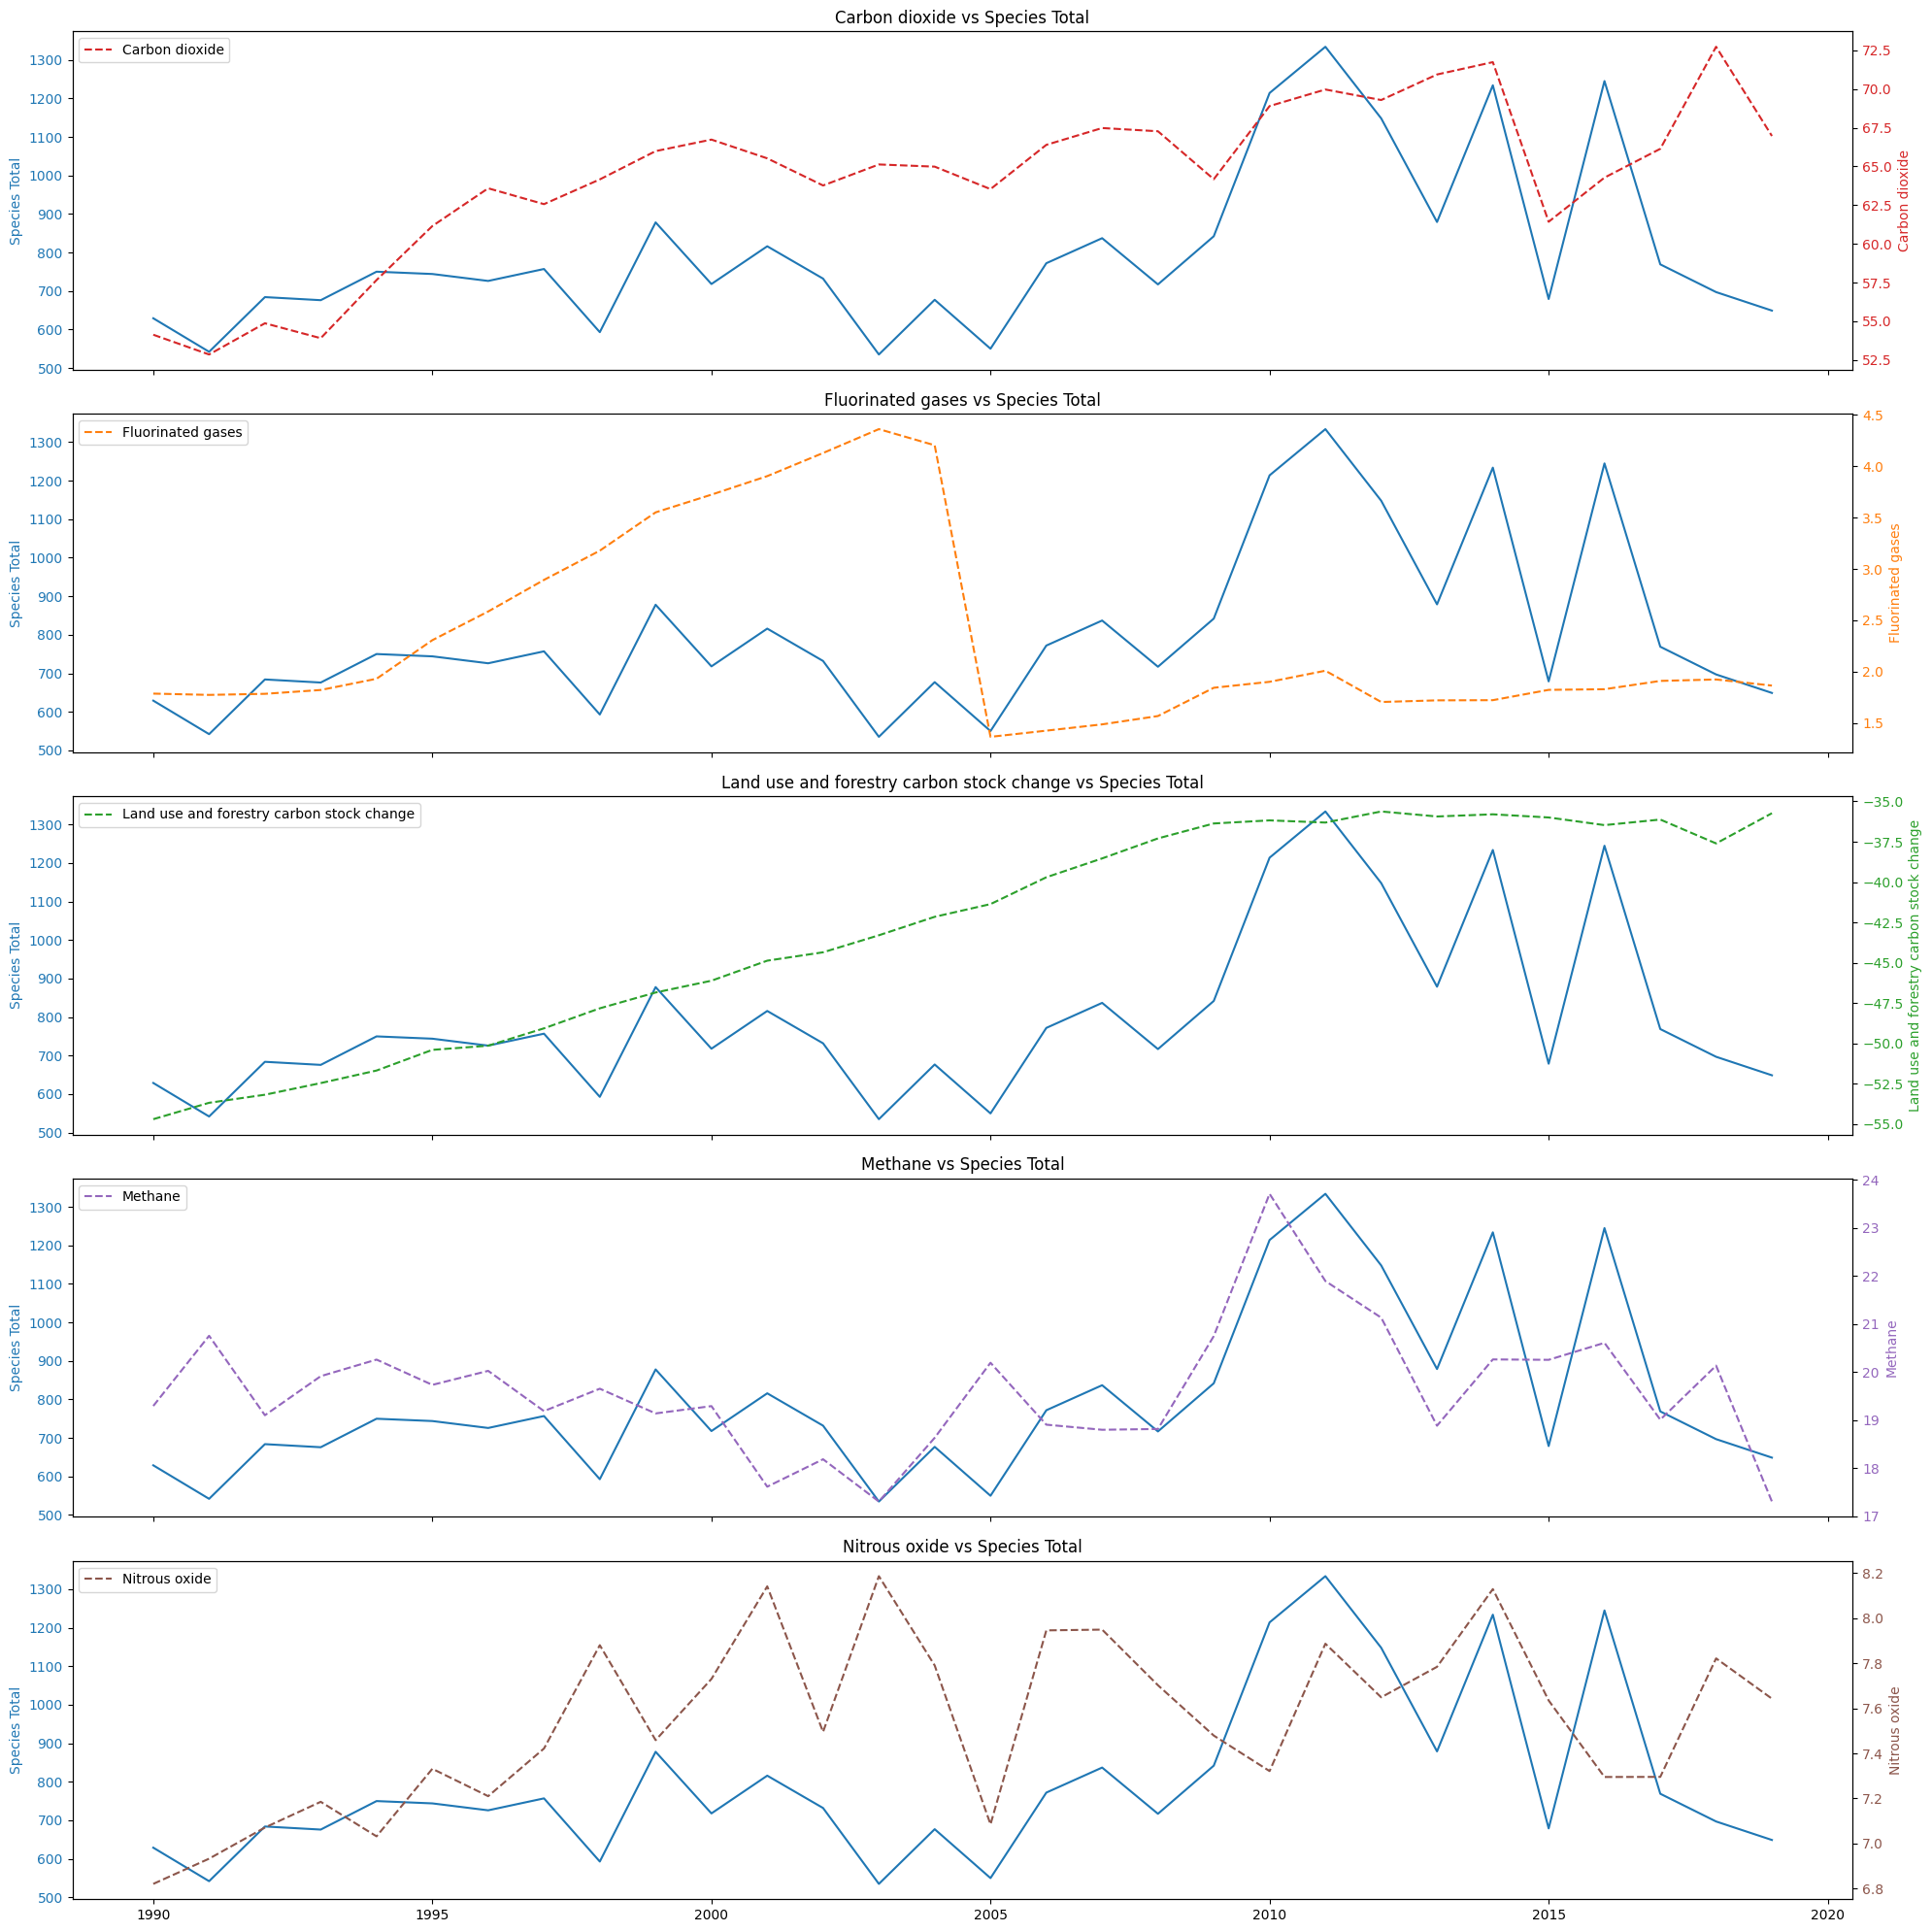

In [9]:
import matplotlib.pyplot as plt

# Arkansas
state_data = df_combined[df_combined['State'] == 7]

fig, axes = plt.subplots(5, 1, figsize=(20, 20), sharex=True)

emission_types = ['Carbon dioxide', 'Fluorinated gases', 'Land use and forestry carbon stock change', 
                  'Methane', 'Nitrous oxide']
colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:brown']

for i, emission in enumerate(emission_types):
    ax = axes[i]  
    
    # species
    ax.set_ylabel('Species Total', color='tab:blue')
    ax.plot(state_data['Year'], state_data['SpeciesTotal'], color='tab:blue', label='Species Total')
    
    # emission type
    ax2 = ax.twinx()  
    ax2.set_ylabel(emission, color=colors[i])
    ax2.plot(state_data['Year'], state_data[emission], color=colors[i], label=emission, linestyle='--')
    
    # key
    ax.set_title(f'{emission} vs Species Total')
    ax.tick_params(axis='y', labelcolor='tab:blue') 
    ax2.tick_params(axis='y', labelcolor=colors[i])  
    ax2.legend(loc='upper left')

fig.tight_layout() 
plt.xlabel('Year')
plt.show()


In [10]:
correlation_matrix = df_combined[['SpeciesTotal', 'Carbon dioxide', 'Fluorinated gases', 
                                  'Land use and forestry carbon stock change', 'Methane', 'Nitrous oxide']].corr()
correlation_matrix


,SpeciesTotal,Carbon dioxide,Fluorinated gases,Land use and forestry carbon stock change,Methane,Nitrous oxide
SpeciesTotal,1.000000,0.915412,0.815209,0.814000,0.372454,0.873839
Carbon dioxide,0.915412,1.000000,0.858797,0.917618,0.430775,0.971450
Fluorinated gases,0.815209,0.858797,1.000000,0.711549,0.603259,0.794049
Land use and forestry carbon stock change,0.814000,0.917618,0.711549,1.000000,0.378159,0.936623
Methane,0.372454,0.430775,0.603259,0.378159,1.000000,0.382065
Nitrous oxide,0.873839,0.971450,0.794049,0.936623,0.382065,1.000000


In [11]:
import statsmodels.api as sm

X = df_combined[['Carbon dioxide', 'Fluorinated gases', 'Land use and forestry carbon stock change','Methane', 'Nitrous oxide']]
X = sm.add_constant(X)
y = df_combined['SpeciesTotal']

# regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     93.52
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           7.87e-33
Time:                        13:01:59   Log-Likelihood:                -680.09
No. Observations:                  90   AIC:                             1372.
Df Residuals:                      84   BIC:                             1387.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [12]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

df_train = df_combined[df_combined['State'].isin([7, 34, 52])]

features = ['Carbon dioxide', 'Fluorinated gases', 'Land use and forestry carbon stock change', 'Methane', 'Nitrous oxide']
X_train = df_train[features]
y_train = df_train['SpeciesTotal']

model = LinearRegression()

cv = KFold(n_splits=5, shuffle=True, random_state=1)

r2_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')

print("Cross-validated R² scores:", np.round(r2_scores, 4))
print("Average R²:", np.round(np.mean(r2_scores), 4))


Cross-validated R² scores: [0.7801 0.798  0.8297 0.8017 0.6416]
Average R²: 0.7702


# Trying out Averages

Instead of testing raw bird populations (sightings), let's try to look at the proportion of birds spotted during the month (e.g instead of looking at January data, look at p1 = total January / total year). This gives us proportions that control for population sizes and are standardized across stations.

In [13]:
# Copy over all data
df2 = df.copy()
df2

,Country,State,Route,Year,Aou,SpeciesTotal
0,124.0,4.0,1.0,1990.0,3160.0,7.0
1,124.0,4.0,1.0,1991.0,3160.0,32.0
2,124.0,4.0,1.0,1992.0,3160.0,1.0
3,124.0,4.0,1.0,1993.0,3160.0,2.0
4,124.0,4.0,1.0,1994.0,3160.0,5.0
...,...,...,...,...,...,...
76660,840.0,92.0,901.0,2018.0,3160.0,1.0
76661,840.0,92.0,902.0,2004.0,3160.0,25.0
76662,840.0,92.0,902.0,2006.0,3160.0,13.0
76663,840.0,92.0,902.0,2015.0,3160.0,2.0


In [14]:
# State level

df2_grouped = df2.groupby(['State', 'Year'], as_index=False)['SpeciesTotal'].sum()
df2_grouped

states = {
    'Arkansas': 7,
    'Illinois': 34,
    'Missouri': 52
}

df_emissions = pd.read_csv("full_data.csv")

df_emissions.rename(columns={'Region': 'State', 'Value': 'Emissions'}, inplace=True)
df_emissions['State'] = df_emissions['State'].map(states)
df_emissions = df_emissions[df_emissions["State"].isin([7, 34, 52])]

df2_filtered = df2_grouped[df2_grouped["State"].isin([7,34,52])]

df_emissions_pivoted = df_emissions.pivot_table(index=['State', 'Year'], columns='Emission Type', values='Emissions', aggfunc='sum')
df_emissions_pivoted.columns = [col for col in df_emissions_pivoted.columns]
df_emissions_pivoted.reset_index(inplace=True)
df2_combined = pd.merge(df2_filtered, df_emissions_pivoted, on=['State', 'Year'], how='left')
df2_combined = df2_combined.drop(columns=['Gross total', 'Net total'])

# Now average it 
# Calculate the total SpeciesTotal for each state
state_totals = df2_combined.groupby('State')['SpeciesTotal'].transform('sum')

# Divide each SpeciesTotal by the total for its state
df2_combined['SpeciesFraction'] = df2_combined['SpeciesTotal'] / state_totals

(df2_combined[df2_combined['State'] == 52.0])


,State,Year,SpeciesTotal,Carbon dioxide,Fluorinated gases,Land use and forestry carbon stock change,Methane,Nitrous oxide,SpeciesFraction
60,52.0,1990.0,1021.0,107.509059,3.710880,-26.745221,16.346032,14.788770,0.022124
61,52.0,1991.0,933.0,107.920089,2.087357,-27.213838,16.466338,13.302337,0.020217
62,52.0,1992.0,1522.0,107.582878,2.023446,-27.193389,16.403655,12.632885,0.032979
63,52.0,1993.0,1031.0,105.493527,2.157657,-26.740170,16.491694,14.219442,0.022340
64,52.0,1994.0,1346.0,113.728963,2.241290,-27.575711,17.053698,13.723466,0.029166
65,52.0,1995.0,1162.0,120.066262,2.610223,-26.046697,16.619020,13.824048,0.025179
66,52.0,1996.0,1307.0,125.470039,2.786934,-27.788979,16.681376,15.093699,0.028321
67,52.0,1997.0,1250.0,129.182866,2.986082,-27.847806,16.434598,14.452427,0.027086
68,52.0,1998.0,1318.0,131.184019,2.903199,-26.389206,16.146931,14.306932,0.028559
69,52.0,1999.0,1104.0,130.941900,3.015938,-26.896383,15.907059,13.296123,0.023922


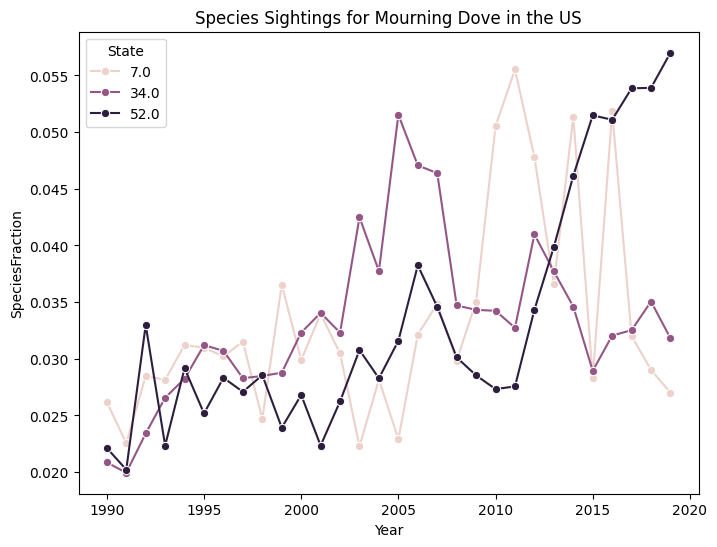

In [18]:
# Visualizing our data 

import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,6))
sns.lineplot(data=df2_combined, x="Year", y="SpeciesFraction", hue="State", marker="o")

plt.title("Species Sightings for Mourning Dove in the US", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("SpeciesFraction", fontsize=10)
plt.show()

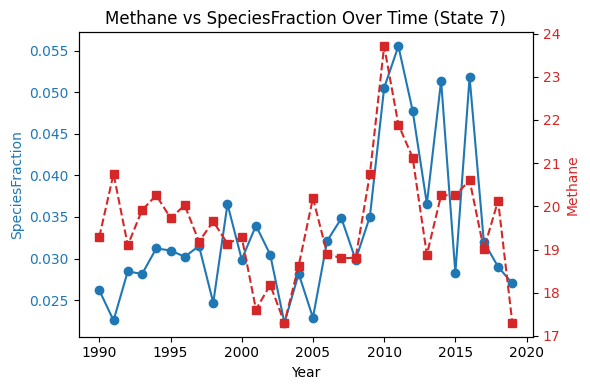

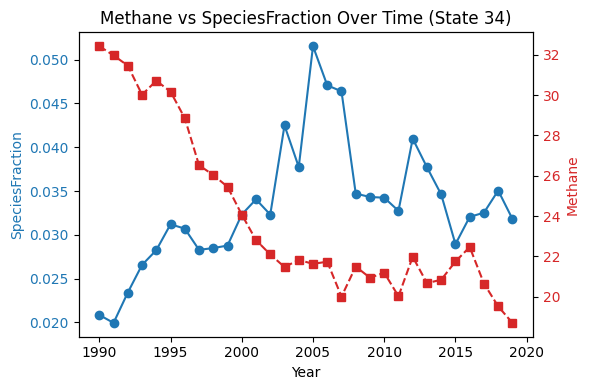

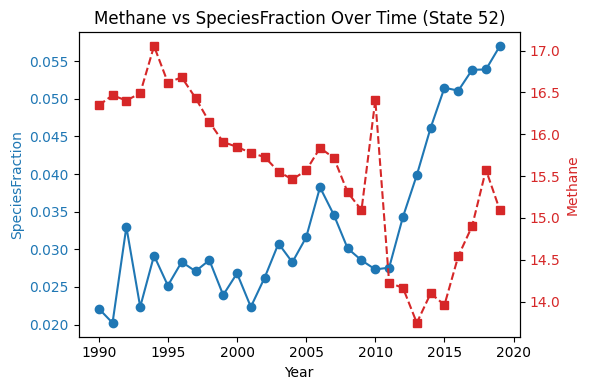

In [27]:
import matplotlib.pyplot as plt

for state in states.values():
    df_state = df2_combined[df2_combined["State"] == state]

    fig, ax1 = plt.subplots(figsize=(6,4))

    # First axis for SpeciesFraction
    ax1.set_title(f"Methane vs SpeciesFraction Over Time (State {state})")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("SpeciesFraction", color="tab:blue")
    ax1.plot(df_state["Year"], df_state["SpeciesFraction"], color="tab:blue", marker="o", label="SpeciesFraction")
    ax1.tick_params(axis='y', labelcolor="tab:blue")

    # Second axis for Methane
    ax2 = ax1.twinx()
    ax2.set_ylabel("Methane", color="tab:red")
    ax2.plot(df_state["Year"], df_state["Methane"], color="tab:red", marker="s", linestyle="--", label="Methane")
    ax2.tick_params(axis='y', labelcolor="tab:red")

    fig.tight_layout()
    plt.show()


In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit the ANCOVA model: SpeciesFraction ~ Methane + State (block)
model = smf.ols('SpeciesFraction ~ Methane + C(State)', data=df2_combined).fit()

# Run ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


            sum_sq    df         F    PR(>F)
C(State)  0.000342   2.0  2.211897  0.115685
Methane   0.000534   1.0  6.898622  0.010211
Residual  0.006657  86.0       NaN       NaN


In [30]:
import statsmodels.formula.api as smf

# Fit linear model with State as a categorical variable
model = smf.ols("SpeciesFraction ~ Methane + C(State)", data=df2_combined).fit()

# View the regression coefficients
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        SpeciesFraction   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.300
Date:                Sun, 20 Apr 2025   Prob (F-statistic):             0.0830
Time:                        13:10:08   Log-Likelihood:                 300.33
No. Observations:                  90   AIC:                            -592.7
Df Residuals:                      86   BIC:                            -582.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0519      0.007  

In [31]:
import statsmodels.api as sm

# Define your predictors (emissions only)
X = df2_combined[['Carbon dioxide', 'Fluorinated gases', 
                  'Land use and forestry carbon stock change', 
                  'Methane', 'Nitrous oxide']]

# Add dummy variables for State (one-hot encode, drop first to avoid multicollinearity)
X = pd.concat([X, pd.get_dummies(df2_combined['State'], prefix='State', drop_first=True)], axis=1)

# Add constant for intercept
X = sm.add_constant(X)

# Define target
y = df2_combined['SpeciesFraction']

# Fit the model
model = sm.OLS(y, X).fit()

# Check results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        SpeciesFraction   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     4.437
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           0.000318
Time:                        13:12:16   Log-Likelihood:                 311.31
No. Observations:                  90   AIC:                            -606.6
Df Residuals:                      82   BIC:                            -586.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### State level

### Station level